In [21]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib
from casatasks import (
    flagmanager,
    flagdata,
    mstransform,
    listobs,
    setjy,
    gaincal,
    bandpass,
    fluxscale,
    applycal,
    tclean,
    rmtables,
    impbcor,
    split,
    uvmodelfit,
    exportfits,
)
import os
from casacore.tables import table
import cmasher as cmr
from matplotlib.dates import DateFormatter
import math 

matplotlib.rcParams['text.usetex'] = True

matplotlib.rcParams['font.family'] = 'serif'

# Source/run information
save_dir = "/data/ATCA/analysis/"
data_dir = "/data/ATCA/ATCA_datareduction/"
target = "J001513"
epoch = "2021-10-15"
band = "X"


In [9]:
# TIMES FOR J020507 SECONDARY 


start_str = "16:59:30"
end_str = "17:01:00"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges = []
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
print(timeranges)


start_str = "17:12:10"
end_str = "17:13:40"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
print(timeranges)


start_str = "18:43:50"
end_str = "18:45:20"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
print(timeranges)

start_str = "18:56:30"
end_str = "18:58:00"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
print(timeranges)

plt_dates_020507_sec = []

for i in range(len(timeranges)):
    plt_dates_020507_sec.append(datetime.datetime.strptime(f"{epoch} {timeranges[i]}", "%Y-%m-%d %H:%M:%S"))

['16:59:30', '17:00:00', '17:00:30', '17:01:00']
['16:59:30', '17:00:00', '17:00:30', '17:01:00', '17:12:10', '17:12:40', '17:13:10', '17:13:40']
['16:59:30', '17:00:00', '17:00:30', '17:01:00', '17:12:10', '17:12:40', '17:13:10', '17:13:40', '18:43:50', '18:44:20', '18:44:50', '18:45:20']
['16:59:30', '17:00:00', '17:00:30', '17:01:00', '17:12:10', '17:12:40', '17:13:10', '17:13:40', '18:43:50', '18:44:20', '18:44:50', '18:45:20', '18:56:30', '18:57:00', '18:57:30', '18:58:00']


In [11]:
# TIMES FOR J020507

start_str = "17:01:50"
end_str = "17:11:20"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges = []
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
print(timeranges)


start_str = "18:46:10"
end_str = "18:55:40"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
print(timeranges)

plt_dates_020507 = []

for i in range(len(timeranges)):
    plt_dates_020507.append(datetime.datetime.strptime(f"{epoch} {timeranges[i]}", "%Y-%m-%d %H:%M:%S"))

['17:01:50', '17:02:20', '17:02:50', '17:03:20', '17:03:50', '17:04:20', '17:04:50', '17:05:20', '17:05:50', '17:06:20', '17:06:50', '17:07:20', '17:07:50', '17:08:20', '17:08:50', '17:09:20', '17:09:50', '17:10:20', '17:10:50', '17:11:20']
['17:01:50', '17:02:20', '17:02:50', '17:03:20', '17:03:50', '17:04:20', '17:04:50', '17:05:20', '17:05:50', '17:06:20', '17:06:50', '17:07:20', '17:07:50', '17:08:20', '17:08:50', '17:09:20', '17:09:50', '17:10:20', '17:10:50', '17:11:20', '18:46:10', '18:46:40', '18:47:10', '18:47:40', '18:48:10', '18:48:40', '18:49:10', '18:49:40', '18:50:10', '18:50:40', '18:51:10', '18:51:40', '18:52:10', '18:52:40', '18:53:10', '18:53:40', '18:54:10', '18:54:40', '18:55:10', '18:55:40']


In [22]:
# TIMES FOR J001513

start_str = "17:53:00"
end_str = "18:02:20"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges = []
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
print(timeranges)

start_str = "19:31:30"
end_str = "19:40:50"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)

plt_dates_001513 = []

for i in range(len(timeranges)):
    plt_dates_001513.append(datetime.datetime.strptime(f"{epoch} {timeranges[i]}", "%Y-%m-%d %H:%M:%S"))

['17:53:00', '17:53:30', '17:54:00', '17:54:30', '17:55:00', '17:55:30', '17:56:00', '17:56:30', '17:57:00', '17:57:30', '17:58:00', '17:58:30', '17:59:00', '17:59:30', '18:00:00', '18:00:30', '18:01:00', '18:01:30', '18:02:00', '18:02:30']


In [35]:
# TIMES FOR J033023

start_str = "16:45:40"
end_str = "16:55:10"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges = []
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
print(timeranges)

start_str = "18:30:20"
end_str = "18:39:50"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
    
    
    
start_str = "20:05:50"
end_str = "20:15:20"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
print(timeranges)



start_str = "20:40:40"
end_str = "20:50:10"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
    
plt_dates_033023 = []

for i in range(len(timeranges)):
    plt_dates_033023.append(datetime.datetime.strptime(f"{epoch} {timeranges[i]}", "%Y-%m-%d %H:%M:%S"))

['16:45:40', '16:46:10', '16:46:40', '16:47:10', '16:47:40', '16:48:10', '16:48:40', '16:49:10', '16:49:40', '16:50:10', '16:50:40', '16:51:10', '16:51:40', '16:52:10', '16:52:40', '16:53:10', '16:53:40', '16:54:10', '16:54:40', '16:55:10']
['16:45:40', '16:46:10', '16:46:40', '16:47:10', '16:47:40', '16:48:10', '16:48:40', '16:49:10', '16:49:40', '16:50:10', '16:50:40', '16:51:10', '16:51:40', '16:52:10', '16:52:40', '16:53:10', '16:53:40', '16:54:10', '16:54:40', '16:55:10', '18:30:20', '18:30:50', '18:31:20', '18:31:50', '18:32:20', '18:32:50', '18:33:20', '18:33:50', '18:34:20', '18:34:50', '18:35:20', '18:35:50', '18:36:20', '18:36:50', '18:37:20', '18:37:50', '18:38:20', '18:38:50', '18:39:20', '18:39:50', '20:05:50', '20:06:20', '20:06:50', '20:07:20', '20:07:50', '20:08:20', '20:08:50', '20:09:20', '20:09:50', '20:10:20', '20:10:50', '20:11:20', '20:11:50', '20:12:20', '20:12:50', '20:13:20', '20:13:50', '20:14:20', '20:14:50', '20:15:20']


In [35]:
# TIMES FOR J033023 L BAND 

start_str = "16:28:00"
end_str = "16:37:20"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges = []
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
print(timeranges)

start_str = "18:12:30"
end_str = "18:22:00"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
    
    
    
start_str = "19:48:10"
end_str = "19:57:40"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
print(timeranges)



start_str = "20:23:10"
end_str = "20:32:40"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
    
    

start_str = "20:58:00"
end_str = "21:07:30"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
    
plt_dates_033023_L = []

for i in range(len(timeranges)):
    plt_dates_033023_L.append(datetime.datetime.strptime(f"{epoch} {timeranges[i]}", "%Y-%m-%d %H:%M:%S"))

['16:28:00', '16:28:30', '16:29:00', '16:29:30', '16:30:00', '16:30:30', '16:31:00', '16:31:30', '16:32:00', '16:32:30', '16:33:00', '16:33:30', '16:34:00', '16:34:30', '16:35:00', '16:35:30', '16:36:00', '16:36:30', '16:37:00', '16:37:30']
['16:28:00', '16:28:30', '16:29:00', '16:29:30', '16:30:00', '16:30:30', '16:31:00', '16:31:30', '16:32:00', '16:32:30', '16:33:00', '16:33:30', '16:34:00', '16:34:30', '16:35:00', '16:35:30', '16:36:00', '16:36:30', '16:37:00', '16:37:30', '18:12:30', '18:13:00', '18:13:30', '18:14:00', '18:14:30', '18:15:00', '18:15:30', '18:16:00', '18:16:30', '18:17:00', '18:17:30', '18:18:00', '18:18:30', '18:19:00', '18:19:30', '18:20:00', '18:20:30', '18:21:00', '18:21:30', '18:22:00', '19:48:10', '19:48:40', '19:49:10', '19:49:40', '19:50:10', '19:50:40', '19:51:10', '19:51:40', '19:52:10', '19:52:40', '19:53:10', '19:53:40', '19:54:10', '19:54:40', '19:55:10', '19:55:40', '19:56:10', '19:56:40', '19:57:10', '19:57:40']


In [23]:
if (os.path.exists(f"{data_dir}data/{epoch}_{band}_{target}_selfcaltime.ms")) is False: 
    mstransform(
        vis=f"{data_dir}data/{epoch}_{band}_{target}_selfcal.ms",
        outputvis=f"{data_dir}data/{epoch}_{band}_{target}_selfcaltime.ms",
        datacolumn="corrected",
        nspw=1,
        regridms=True,
        field=target,
        combinespws=True
    )
tar_ms = f"{data_dir}data/{epoch}_{band}_{target}_selfcaltime.ms"

fluxes = []

outfile = f"{data_dir}/J020507/casa_files/{target}_{band}_{epoch}.cl"
if (os.path.exists(outfile))is False: 
    uvmodelfit(
        vis=tar_ms,
        niter=10,
        comptype='P',
        outfile=outfile,
        field="0",
        selectdata=True,
        timerange="",
    )
    tbl = table(outfile)
    flux = tbl.getcell("Flux", 0)[0].astype("float64")
    
else:
    tbl = table(outfile)
    flux = tbl.getcell("Flux", 0)[0].astype("float64")
    
# print(j020507)
    
for i in range(len(timeranges)):
    timerange = f"{timeranges[i]}+00:00:30"
    outfile = f"{data_dir}/J020507/casa_files/{target}_{band}_{epoch}_{timerange}.cl"
    if (os.path.exists(outfile))is False: 
        uvmodelfit(
            vis=tar_ms,
            niter=10,
            comptype='P',
    #         spw="0",
    #         sourcepar=[0.3, 2.6, 0.7],
            outfile=outfile,
            field="0",
            selectdata=True,
            timerange=timerange,
        )
        tbl = table(outfile)
        flux = tbl.getcell("Flux", 0)[0].astype("float64")
        fluxes.append(flux)
    else:
        tbl = table(outfile)
        flux = tbl.getcell("Flux", 0)[0].astype("float64")
        fluxes.append(flux)


Successful readonly open of default-locked table /data/ATCA/ATCA_datareduction//J020507/casa_files/J001513_X_2021-10-15.cl: 20 columns, 1 rows
Successful readonly open of default-locked table /data/ATCA/ATCA_datareduction//J020507/casa_files/J001513_X_2021-10-15_17:53:00+00:00:30.cl: 20 columns, 1 rows
Successful readonly open of default-locked table /data/ATCA/ATCA_datareduction//J020507/casa_files/J001513_X_2021-10-15_17:53:30+00:00:30.cl: 20 columns, 1 rows
Successful readonly open of default-locked table /data/ATCA/ATCA_datareduction//J020507/casa_files/J001513_X_2021-10-15_17:54:00+00:00:30.cl: 20 columns, 1 rows
Successful readonly open of default-locked table /data/ATCA/ATCA_datareduction//J020507/casa_files/J001513_X_2021-10-15_17:54:30+00:00:30.cl: 20 columns, 1 rows
Successful readonly open of default-locked table /data/ATCA/ATCA_datareduction//J020507/casa_files/J001513_X_2021-10-15_17:55:00+00:00:30.cl: 20 columns, 1 rows
Successful readonly open of default-locked table /da

/home/katross/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
/home/katross/.local/lib/python3.6/site-packages/ipykernel_launcher.py:55: ComplexWarning: Casting complex values to real discards the imaginary part


In [13]:
j020507_c_fluxes = fluxes 
j020507_c = flux 

In [9]:
j001513_c_fluxes = fluxes
j001513_c = flux 

In [6]:
j001513_x_fluxes = fluxes
j001513_x = flux 

In [16]:
j020507_x_fluxes = fluxes 
j020507_x = flux 

In [11]:
j020507_sec_c_fluxes = fluxes 
j020507_sec_c = flux 

In [15]:
j020507_sec_x_fluxes = fluxes 
j020507_sec_x = flux 

In [43]:
j033023_x_fluxes = fluxes
j033023_x = flux 

In [37]:
j033023_c_fluxes = fluxes
j033023_c = flux

In [42]:
j033023_l_fluxes = fluxes
j033023_l = flux

In [83]:
j020507_c_plt = (j020507_c_fluxes*1000)-(1000*np.nanmedian(j020507_c))

In [49]:
# plt_dates_001513 = plt_dates_001513 - datetime.timedelta(hours=0, minutes=52)

for i in range(len(plt_dates_001513)):
    plt_dates_001513[i] = plt_dates_001513[i] - datetime.timedelta(hours=0, minutes=52)

In [24]:
errs = np.full(len(j020507_c_fluxes), np.std(j020507_c_fluxes))
print(errs)

j020507_c_fluxes_pc = (j020507_c_fluxes/np.median(j020507_c_fluxes)) -1 
j020507_x_fluxes_pc = (j020507_x_fluxes/np.median(j020507_x_fluxes)) -1 

j001513_c_fluxes_pc = (j001513_c_fluxes/np.median(j001513_c_fluxes)) -1 
j001513_x_fluxes_pc = (j001513_x_fluxes/np.median(j001513_x_fluxes)) -1 
print(j001513_c_fluxes_pc)

[0.00087879 0.00087879 0.00087879 0.00087879 0.00087879 0.00087879
 0.00087879 0.00087879 0.00087879 0.00087879 0.00087879 0.00087879
 0.00087879 0.00087879 0.00087879 0.00087879 0.00087879 0.00087879
 0.00087879 0.00087879 0.00087879 0.00087879 0.00087879 0.00087879
 0.00087879 0.00087879 0.00087879 0.00087879 0.00087879 0.00087879
 0.00087879 0.00087879 0.00087879 0.00087879 0.00087879 0.00087879
 0.00087879 0.00087879 0.00087879 0.00087879]
[ 0.06659868  0.06351162  0.07085474  0.06759609  0.06615313  0.06963057
  0.07063728  0.07647409  0.07926418  0.07672739  0.07239967  0.08070982
  0.08056557  0.08574422  0.0811395   0.07937169  0.0866562   0.09068733
  0.09294989  0.08839628 -0.07131059 -0.06532958 -0.07087894 -0.06783355
 -0.06744046 -0.07229072 -0.06351162 -0.06525332 -0.0733721  -0.0778387
 -0.07516258 -0.08169668 -0.07685378 -0.08651807 -0.0919441  -0.08860923
 -0.08107294 -0.08989937 -0.0895664  -0.09050306]


In [19]:
mod_c_020507 = round(np.std(j020507_c_fluxes)/np.median(j020507_c_fluxes), -int(math.floor(math.log10(abs(np.std(j020507_c_fluxes)/np.median(j020507_c_fluxes))))))
mod_x_020507 = round(np.std(j020507_x_fluxes)/np.median(j020507_x_fluxes), -int(math.floor(math.log10(abs(np.std(j020507_x_fluxes)/np.median(j020507_x_fluxes))))))
mod_c_001513 = round(np.std(j001513_c_fluxes)/np.median(j001513_c_fluxes), -int(math.floor(math.log10(abs(np.std(j001513_c_fluxes)/np.median(j001513_c_fluxes))))))
mod_x_001513 = round(np.std(j001513_x_fluxes)/np.median(j001513_x_fluxes), -int(math.floor(math.log10(abs(np.std(j001513_x_fluxes)/np.median(j001513_x_fluxes))))))
# mod_c_033023 = round(np.std(j033023_c_fluxes)/np.median(j033023_c_fluxes), -int(math.floor(math.log10(abs(np.std(j033023_c_fluxes)/np.median(j033023_c_fluxes))))))
# mod_x_033023 = round(np.std(j033023_x_fluxes)/np.median(j033023_x_fluxes), -int(math.floor(math.log10(abs(np.std(j033023_x_fluxes)/np.median(j033023_x_fluxes))))))

In [20]:
print(j001513_x_fluxes)

[0.07230872755665689, 0.07195923956714445, 0.07196365491703452, 0.07197830544367075, 0.07160409273067368, 0.07256683704484124, 0.07242309917900815, 0.07226557223805409, 0.07268902682681477, 0.07264138634933226, 0.07223428400378142, 0.0729417671182145, 0.07315805432430528, 0.0729469798259455, 0.07332939092899202, 0.07324150551967332, 0.07336581801120241, 0.07321813424495147, 0.07387257127643682, 0.07347076336222846, 0.054897749880216964, 0.054131871216021366, 0.05415962824413137, 0.05376519343065882, 0.05363022534994084, 0.05369192311731612, 0.05368072694564887, 0.053683252575238184, 0.053560766607888964, 0.05323181995125264, 0.053131735160250666, 0.05379377443399188, 0.05269377975521525, 0.05295841402467944, 0.05190436356937176, 0.05287292223872357, 0.052784319560595525, 0.05267566078646804, 0.05193554399598983, 0.05313759844884931]


/usr/lib/python3/dist-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)
/usr/lib/python3/dist-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


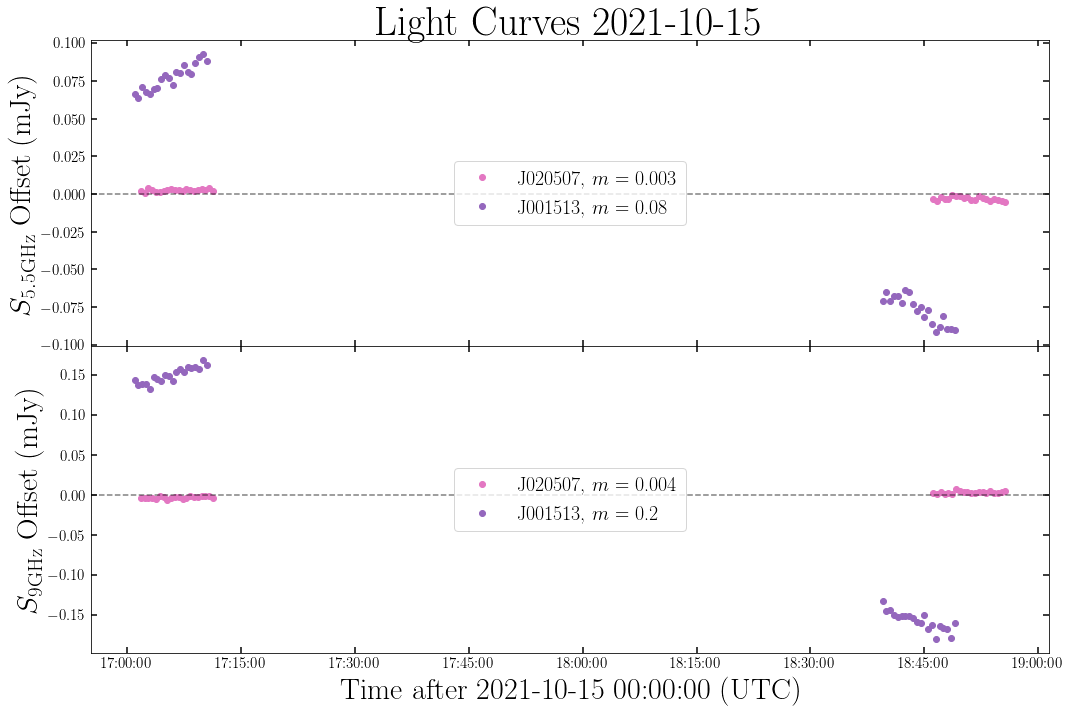

In [198]:
fig = plt.figure(1, figsize=(15,10),facecolor='white')
gs = fig.add_gridspec(2,hspace=0)
axes = gs.subplots(sharex=True)
axes[0].set_title("Light Curves 2021-10-15", fontsize=40)
# axes[0].plot_date(plt_dates_020507_sec, (j020507_sec_c_fluxes-j020507_sec_c), label="Sec")
# axes[1].plot_date(plt_dates_020507_sec, (j020507_sec_x_fluxes-j020507_sec_x), label="Sec")

axes[0].plot_date(plt_dates_020507, j020507_c_fluxes_pc, color="C6",label=f"J020507, $m=$ {mod_c_020507}")
axes[1].plot_date(plt_dates_020507, j020507_x_fluxes_pc, color='C6',label=f"J020507, $m=$ {mod_x_020507}")
axes[0].plot_date(plt_dates_001513, j001513_c_fluxes_pc, color="C4",label=f"J001513, $m=$ {mod_c_001513}")
axes[1].plot_date(plt_dates_001513, j001513_x_fluxes_pc, color='C4', label=f"J001513, $m=$ {mod_x_001513}")
# axes[0].plot_date(plt_dates_033023, (j033023_c_fluxes-np.nanmedian(j033023_c_fluxes))*1000,color="C9",label=f"J033023, $m=$ {mod_c_033023}")
# axes[1].plot_date(plt_dates_033023, (j033023_x_fluxes-np.nanmedian(j033023_x_fluxes)),color='C9', label="J033023")
axes[0].set_ylabel(r"$S_{5.5\mathrm{GHz}}$ Offset (mJy)",fontsize = 30)
axes[1].set_ylabel(r"$S_{9\mathrm{GHz}}$ Offset (mJy)",fontsize = 30)
axes[1].set_xlabel(r"Time after 2021-10-15 00:00:00 (UTC)",fontsize = 30)
myFmt = DateFormatter("%H:%M:%S")
axes[1].xaxis.set_major_formatter(myFmt)
# customize tick directions and lengths
axes[0].tick_params(
    axis="both", which="major", direction="in", length=6, width=1.5, pad=5
)
axes[0].tick_params(
    axis="both", which="minor", direction="in", length=4, width=1.5
)
axes[1].tick_params(
    axis="both", which="major", direction="in", length=6, width=1.5, pad=5
)
axes[1].tick_params(
    axis="both", which="minor", direction="in", length=4, width=1.5
)
axes[0].tick_params(
    axis="both", which="both", labelsize="15", right=True, top=True
)
axes[1].tick_params(
    axis="both", which="both", labelsize="15", right=True, top=True
)
axes[0].legend(loc="center", fontsize=20)
axes[1].legend(loc="center", fontsize=20)
axes[0].axhline(y=0, color='k', alpha=0.5, linestyle='--')
axes[1].axhline(y=0, color='k', alpha=0.5, linestyle='--')
plt.tight_layout()
plt.savefig("/data/ATCA/analysis/2021-10-15-lightcurve.png",facecolor=fig.get_facecolor(),transparent=False)


In [226]:
first_half = plt_dates_001513[0:20]
secondhalf = plt_dates_001513[20:40]

ticklabels = np.array([datetime.datetime.strptime("00:00:00", "%H:%M:%S") +datetime.timedelta(minutes=i) for i in [0, 5, 10 ,15, 20, 25]])
ticklabels2 = np.array([datetime.datetime.strptime("01:40:00", "%H:%M:%S") +datetime.timedelta(minutes=i) for i in [0, 5, 10 ,15, 20, 25]])

for i in range(len(ticklabels)):
    ticklabels[i] = ticklabels[i].strftime("%H:%M:%S")
    ticklabels2[i] = ticklabels2[i].strftime("%H:%M:%S")
# first_half[0] = first_half[0] - datetime.timedelta(hours=0, minutes=7.5)
# first_half[-1] = first_half[-1] + datetime.timedelta(hours=0, minutes=7.5)
# secondhalf[0] = secondhalf[0] - datetime.timedelta(hours=0, minutes=15)
# secondhalf[-1] = secondhalf[-1] + datetime.timedelta(hours=0, minutes=5)

# print(datetime.datetime.strptime(ticklabels[0],"%H:%M:%S"))




In [ ]:
# Geneerate errors 



/home/katross/.local/lib/python3.6/site-packages/ipykernel_launcher.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


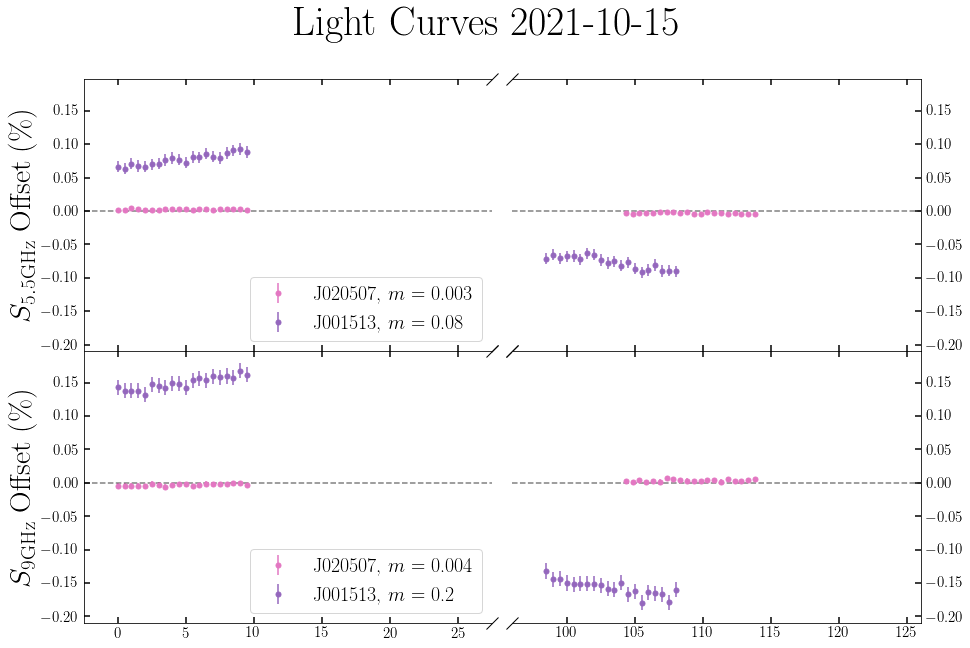

In [255]:
fig = plt.figure(1, figsize=(15,10),facecolor='white')
gs = fig.add_gridspec(2,2,hspace=0,wspace=0.05)
ax = gs.subplots(sharey=True)
fig.suptitle("Light Curves 2021-10-15", fontsize=40)

axc = ax[0]
axx = ax[1]
axc[0].errorbar(scan_times_arr, j020507_c_fluxes_pc[0:20], yerr=np.std(j020507_c_fluxes_pc), color="C6",label=f"J020507, $m=$ {mod_c_020507}",linestyle="None",marker="o", markersize=5)
axc[1].errorbar(scan_times_0205_2, j020507_c_fluxes_pc[20:40],yerr=np.std(j020507_c_fluxes_pc),color="C6",label=f"J020507, $m=$ {mod_c_020507}",linestyle="None",marker="o", markersize=5)
axx[0].errorbar(scan_times_arr, j020507_x_fluxes_pc[0:20],yerr=np.std(j020507_x_fluxes_pc),color='C6',label=f"J020507, $m=$ {mod_x_020507}",linestyle="None",marker="o", markersize=5)
axx[1].errorbar(scan_times_0205_2, j020507_x_fluxes_pc[20:40],yerr=np.std(j020507_x_fluxes_pc), color='C6',label=f"J020507, $m=$ {mod_x_020507}",linestyle="None",marker="o", markersize=5)

axc[0].errorbar(scan_times_arr, j001513_c_fluxes_pc[0:20],yerr=np.std(j001513_c_fluxes_pc[0:20]),color="C4",label=f"J001513, $m=$ {mod_c_001513}",linestyle="None",marker="o", markersize=5)
axc[1].errorbar(scan_times_0015_2, j001513_c_fluxes_pc[20:40],yerr=np.std(j001513_c_fluxes_pc[0:20]),color="C4",label=f"J001513, $m=$ {mod_c_001513}",linestyle="None",marker="o", markersize=5)
axx[0].errorbar(scan_times_arr, j001513_x_fluxes_pc[0:20],yerr=np.std(j001513_x_fluxes_pc[20:40]),color='C4', label=f"J001513, $m=$ {mod_x_001513}",linestyle="None",marker="o", markersize=5)
axx[1].errorbar(scan_times_0015_2, j001513_x_fluxes_pc[20:40],yerr=np.std(j001513_x_fluxes_pc[20:40]),color='C4', label=f"J001513, $m=$ {mod_x_001513}",linestyle="None",marker="o", markersize=5)

axc[0].set_ylabel(r"$S_{5.5\mathrm{GHz}}$ Offset (\%)",fontsize = 30)
axx[0].set_ylabel(r"$S_{9\mathrm{GHz}}$ Offset (\%)",fontsize = 30)
# fig.supxlabel(r"Time after 2021-10-15 00:00:00 (UTC)",fontsize = 30)

# customize tick directions and lengths
axc[0].tick_params(
    axis="both", which="major", direction="in", length=6, width=1.5, pad=5
)
axc[0].tick_params(
    axis="both", which="minor", direction="in", length=4, width=1.5
)
axc[1].tick_params(
    axis="both", which="major", direction="in", length=6, width=1.5, pad=5
)
axc[1].tick_params(
    axis="both", which="minor", direction="in", length=4, width=1.5
)
axc[0].tick_params(
    axis="both", which="both", labelsize="15", right=True, top=True
)
axc[1].tick_params(
    axis="both", which="both", labelsize="15", right=True, top=True
)


axx[0].tick_params(
    axis="both", which="major", direction="in", length=6, width=1.5, pad=5
)
axx[0].tick_params(
    axis="both", which="minor", direction="in", length=4, width=1.5
)
axx[1].tick_params(
    axis="both", which="major", direction="in", length=6, width=1.5, pad=5
)
axx[1].tick_params(
    axis="both", which="minor", direction="in", length=4, width=1.5
)
axx[0].tick_params(
    axis="both", which="both", labelsize="15", right=True, top=True
)
axx[1].tick_params(
    axis="both", which="both", labelsize="15", right=True, top=True
)


axc[0].legend(loc='lower right', fontsize=20)
axx[0].legend(loc='lower right', fontsize=20)

axc[0].spines['right'].set_visible(False)
axc[1].spines['left'].set_visible(False)
axc[0].yaxis.set_ticks_position('left')
axc[1].yaxis.set_ticks_position('right')
axx[0].spines['right'].set_visible(False)
axx[1].spines['left'].set_visible(False)
axx[0].yaxis.set_ticks_position('left')
axx[1].yaxis.set_ticks_position('right')

axc[0].xaxis.set_ticklabels([])
axc[1].xaxis.set_ticklabels([])

axc[0].set_xlim([-2.5,27.5])
axx[0].set_xlim([-2.5,27.5])

axc[1].set_xlim([98.5-2.5,98.5+27.5 ])
axx[1].set_xlim([98.5-2.5,98.5+27.5 ])
d=1

kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, linestyle="none", color='k', mec='k', mew=1, clip_on=False)

axc[0].plot([1, 1],[0,1], transform=axc[0].transAxes, **kwargs)
axc[1].plot([0, 0],[0,1], transform=axc[1].transAxes, **kwargs)

axx[0].plot([1, 1],[0,1], transform=axx[0].transAxes, **kwargs)
axx[1].plot([0, 0],[0,1], transform=axx[1].transAxes, **kwargs)


axc[0].axhline(y=0, color='k', alpha=0.5, linestyle='--')
axc[1].axhline(y=0, color='k', alpha=0.5, linestyle='--')
axx[0].axhline(y=0, color='k', alpha=0.5, linestyle='--')
axx[1].axhline(y=0, color='k', alpha=0.5, linestyle='--')
plt.tight_layout()
plt.savefig("/data/ATCA/analysis/2021-10-15-lightcurve.png",facecolor=fig.get_facecolor(),transparent=False)
